# Telco Customer Churn Dataset <a class="anchor"  id="top"></a>

---


**Contents**
<hr>

* [Preparation](#preparation)
* [Data Discovery](#data-discovery)
    * [Data-types](#data-types)
* [Manual Validation](#manual-validation)

#### Preparation <a class="anchor"  id="preparation"></a>
---

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import janitor
import pickle
from plotnine import *
import numpy as np
import pandas_flavor as pf
import holoviews as hv
import hvplot.pandas
from holoviews import opts, dim
from hvplot.plotting import scatter_matrix
hv.extension('bokeh')

pd.options.display.max_columns = 50
pd.options.plotting.backend = 'holoviews'
hv.opts.defaults(active_tools=['pan'])
hv.plotting.bokeh.element.ElementPlot.active_tools = []

# with open('data_features.pickle', 'rb') as p:
#     data_features = pickle.load(p)

# list of features provided from the dataset info
data_features = {'demographics': ['customerid',
  'count',
  'gender',
  'senior_citizen',
  'partner',
  'dependents'],
 'location': ['country',
  'state',
  'city',
  'lat_long',
  'latitude',
  'longitude',
  'zip_code'],
 'services': ['total_charges',
  'tenure_months',
  'tech_support',
  'streaming_tv',
  'streaming_movies',
  'phone_service',
  'payment_method',
  'paperless_billing',
  'online_security',
  'online_backup',
  'multiple_lines',
  'monthly_charges',
  'internet_service',
  'device_protection',
  'contract'],
 'status': ['cltv', 'churn_value', 'churn_score', 'churn_reason']}

In [2]:
# load data features
demographics = data_features.get('demographics')
location = data_features.get('location')
services = data_features.get('services')

# clean column names
churn_df = pd.read_excel('telco-churn.xlsx')\
    .clean_names()\
    .remove_empty()

In [3]:
# let's take a glimpose of the first 3 entries of our data
churn_df.head(3).T

0                      1  \
customerid                           3668-QPYBK             9237-HQITU   
count                                         1                      1   
country                           United States          United States   
state                                California             California   
city                                Los Angeles            Los Angeles   
zip_code                                  90003                  90005   
lat_long                 33.964131, -118.272783  34.059281, -118.30742   
latitude                              33.964131              34.059281   
longitude                           -118.272783             -118.30742   
gender                                     Male                 Female   
senior_citizen                               No                     No   
partner                                      No                     No   
dependents                                   No                    Yes   
tenure_months                                 2                      2   
phone_service                               Yes                    Yes   
multiple_lines                               No                     No   
internet_service                            DSL            Fiber optic   
online_security                             Yes                     No   
online_backup                               Yes                     No   
device_protection                            No                     No   
tech_support                                 No                     No   
streaming_tv                                 No                     No   
streaming_movies                             No                     No   
contract                         Month-to-month         Month-to-month   
paperless_billing                           Yes                    Yes   
payment_method                     Mailed check       Electronic check   
monthly_charges                           53.85                   70.7   
total_charges                            108.15                 151.65   
churn_label                                 Yes                    Yes   
churn_value                                   1                      1   
churn_score                                  86                     67   
cltv                                       3239                   2701   
churn_reason       Competitor made better offer                  Moved   

                                        2  
customerid                     9305-CDSKC  
count                                   1  
country                     United States  
state                          California  
city                          Los Angeles  
zip_code                            90006  
lat_long           34.048013, -118.293953  
latitude                        34.048013  
longitude                     -118.293953  
gender                             Female  
senior_citizen                         No  
partner                                No  
dependents                            Yes  
tenure_months                           8  
phone_service                         Yes  
multiple_lines                        Yes  
internet_service              Fiber optic  
online_security                        No  
online_backup                          No  
device_protection                     Yes  
tech_support                           No  
streaming_tv                          Yes  
streaming_movies                      Yes  
contract                   Month-to-month  
paperless_billing                     Yes  
payment_method           Electronic check  
monthly_charges                     99.65  
total_charges                       820.5  
churn_label                           Yes  
churn_value                             1  
churn_score                            86  
cltv                                 5372  
churn_reason                        Moved

### Data Discovery <a class="anchor"  id="data-discovery"></a>
---

In [4]:
# Do we have missing data?
churn_df.isna().any()

customerid           False
count                False
country              False
state                False
city                 False
zip_code             False
lat_long             False
latitude             False
longitude            False
gender               False
senior_citizen       False
partner              False
dependents           False
tenure_months        False
phone_service        False
multiple_lines       False
internet_service     False
online_security      False
online_backup        False
device_protection    False
tech_support         False
streaming_tv         False
streaming_movies     False
contract             False
paperless_billing    False
payment_method       False
monthly_charges      False
total_charges        False
churn_label          False
churn_value          False
churn_score          False
cltv                 False
churn_reason          True
dtype: bool

In [5]:
# Do we have duplicated values?
churn_df.duplicated().sum()

0

In [6]:
# Do are customerid contain non-unique/duplicated entries?
(churn_df.customerid.value_counts() > 1).sum()

0

In [7]:
# Do we have person counts greater than 1?
(churn_df['count'] > 1).sum()

0

#### Data Types <a class="anchor"  id="data-types"></a>
---

In [8]:
# check our dataframe types
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customerid         7043 non-null   object 
 1   count              7043 non-null   int64  
 2   country            7043 non-null   object 
 3   state              7043 non-null   object 
 4   city               7043 non-null   object 
 5   zip_code           7043 non-null   int64  
 6   lat_long           7043 non-null   object 
 7   latitude           7043 non-null   float64
 8   longitude          7043 non-null   float64
 9   gender             7043 non-null   object 
 10  senior_citizen     7043 non-null   object 
 11  partner            7043 non-null   object 
 12  dependents         7043 non-null   object 
 13  tenure_months      7043 non-null   int64  
 14  phone_service      7043 non-null   object 
 15  multiple_lines     7043 non-null   object 
 16  internet_service   7043 

#### Manual Validation <a class="anchor"  id="manual-validation"></a>
---

In [9]:
# create data types
dtypes_df = churn_df.dtypes.rename_axis('col').reset_index(name='dtype')

# manual check of each feature
# data_validated = []
# for col_name, col_dtype in zip(dtypes_df['col'], dtypes_df['dtype']):
#     print(f"""> Should {col_name} be of {col_dtype} data type?""")
#     choice = input()
#     data_validated.append(choice)

# save "to inspect" features to pickle
# with open('validation_check.pickle', 'wb') as p:
#     pickle.dump(dtypes_df, p)

# with open('validation_check.pickle', 'rb') as p:
#     data_validated = pickle.load(p)

# which features should we further inspect?
# dtypes_df['correct_type'] = data_validated
# dtypes_df[dtypes_df.correct_type == 'n']

In [10]:
# data_validated[data_validated.correct_type == 'n']

col   dtype correct_type
5        zip_code   int64            n
6        lat_long  object            n
27  total_charges  object            n

#### Investigating the features
* `zip_code` should be of object data type since it's used for identification code
* `lat_long` inspect if its a tuple object or a python object. (Unsure about the output.)
* `total_charges` should be of numerical datatype either float or int. since it's currency we'll stick with float.

In [11]:
# check lat_long
print(churn_df['lat_long'][0])
type(churn_df['lat_long'][0])

33.964131, -118.272783


str

Here latitude longitude should be a tuple object, but we'll flag this feature for now. We'll have to inspect depending on our 
geo plotting library of choice.

In [12]:
churn_df['zip_code'] = churn_df.zip_code.astype('object')

try:
    churn_df['total_charges'].astype('float')
    
except ValueError as e:
    print('ValueError:', e)

ValueError: could not convert string to float: ' '


Look's like we're having trouble here, a value error was raised due to an empty string during conversion the series to float.
We'll have to first look at the entries with an blank space. (There might be a case of having multiple blank spaces, we don't know yet)


In [13]:
# we can use utilize our isinstance func
total_charges_obj_index = []
for index, x in enumerate(churn_df.total_charges):
    if isinstance(x, str):
        total_charges_obj_index.append(index)

Let's check the object entries before making changes

In [14]:
churn_df.iloc[total_charges_obj_index][:5]

customerid  count        country       state            city zip_code  \
2234  4472-LVYGI      1  United States  California  San Bernardino    92408   
2438  3115-CZMZD      1  United States  California    Independence    93526   
2568  5709-LVOEQ      1  United States  California       San Mateo    94401   
2667  4367-NUYAO      1  United States  California       Cupertino    95014   
2856  1371-DWPAZ      1  United States  California        Redcrest    95569   

                    lat_long   latitude   longitude  gender senior_citizen  \
2234  34.084909, -117.258107  34.084909 -117.258107  Female             No   
2438  36.869584, -118.189241  36.869584 -118.189241    Male             No   
2568  37.590421, -122.306467  37.590421 -122.306467  Female             No   
2667  37.306612, -122.080621  37.306612 -122.080621    Male             No   
2856  40.363446, -123.835041  40.363446 -123.835041  Female             No   

     partner dependents  tenure_months phone_service    multiple_lines  \
2234     Yes         No              0            No  No phone service   
2438      No         No              0           Yes                No   
2568     Yes         No              0           Yes                No   
2667     Yes        Yes              0           Yes               Yes   
2856     Yes         No              0            No  No phone service   

     internet_service      online_security        online_backup  \
2234              DSL                  Yes                   No   
2438               No  No internet service  No internet service   
2568              DSL                  Yes                  Yes   
2667               No  No internet service  No internet service   
2856              DSL                  Yes                  Yes   

        device_protection         tech_support         streaming_tv  \
2234                  Yes                  Yes                  Yes   
2438  No internet service  No internet service  No internet service   
2568                  Yes                   No                  Yes   
2667  No internet service  No internet service  No internet service   
2856                  Yes                  Yes                  Yes   

         streaming_movies  contract paperless_billing  \
2234                   No  Two year               Yes   
2438  No internet service  Two year                No   
2568                  Yes  Two year                No   
2667  No internet service  Two year                No   
2856                   No  Two year                No   

                 payment_method  monthly_charges total_charges churn_label  \
2234  Bank transfer (automatic)            52.55                        No   
2438               Mailed check            20.25                        No   
2568               Mailed check            80.85                        No   
2667               Mailed check            25.75                        No   
2856    Credit card (automatic)            56.05                        No   

      churn_value  churn_score  cltv churn_reason  
2234            0           36  2578          NaN  
2438            0           68  5504          NaN  
2568            0           45  2048          NaN  
2667            0           48  4950          NaN  
2856            0           30  4740          NaN

In [15]:
# let's drop and store our df to a new variable name try to convert it again (store in churn_df0)
churn_df0 = churn_df.drop(total_charges_obj_index)

try:
    churn_df0.total_charges.astype('float')
except AttributeError as e:
    print(e)

Looks like we're done with validating our entries now let's investigate more!

#### Organize Dataframe for further data investigation
---

Let's check the distribution of our class variable

In [16]:
churn_df0.churn_value.value_counts()

churn_value
0    5163
1    1869
Name: count, dtype: int64

In [17]:
np.round(churn_df0.churn_value.value_counts(normalize=True) * 100, 2)

churn_value
0    73.42
1    26.58
Name: proportion, dtype: float64

#### Calculating Probabilities of Churn in terms of Demographics
---

In [18]:
@pf.register_dataframe_method
def insert_class_var(df):
    """
    Insert our class variable (churn_values) to dataframe
    """
    global churn_df0
    df = df.assign(churn_value=churn_df0.churn_value)
    return df

@pf.register_dataframe_method
def insert_invert_class_var(df):
    """
    Invert and insert our class variable (from False to True) to dataframe
    """
    inverted_class = np.invert(df.churn_value.astype('bool')).astype('int')
    df = df.assign(inv_churn_value=inverted_class)
    return df

@pf.register_dataframe_method
def get_proba(df):
    """
    Creates a probability series (proba) in our dataframe.
    """
    df = df.assign(proba=df.churn_value / df.total_in_group)
    return df

In [19]:
# organized dataframes
demographics_df = churn_df0[demographics]
location_df = churn_df0[location]
services_df = churn_df0[services]
demographics_df = insert_class_var(demographics_df)

# cross tabulate the demographics dataframe
demo_df = pd.melt(pd.crosstab([demographics_df.gender], [
    demographics_df.gender,
    demographics_df.senior_citizen,
    demographics_df.partner,
    demographics_df.dependents,
]))

# insert the class variable to our filtere demographgics df and add an inverted class(no churn) series.
demographics_df0 = demographics_df.insert_class_var().insert_invert_class_var()

# next we'll have to group our features and total the churn entries and non churn entries
group_demographics_df0 = demographics_df0\
    .groupby(['gender', 'senior_citizen', 'partner', 'dependents'])\
        [['churn_value', 'inv_churn_value']].sum()

# let's create total of churn + no churn (basically the total entries of our dataset)
group_demographics_df0['total_in_group'] = group_demographics_df0['churn_value'] + group_demographics_df0['inv_churn_value']

# use get proba function and restore it in the same variable name
group_demographics_df0 = group_demographics_df0.get_proba()

In [20]:
group_demographics_df1 = group_demographics_df0.reset_index().sort_values(['total_in_group', 'proba'], ascending=False)
group_demographics_df1.style.background_gradient(subset='proba', cmap='Oranges')

Remember that these are probability within groups!

#### Sankey for Churned Demographics
---

In [21]:
@pf.register_dataframe_method
def sankey_rename_cols(df):
    """ A quick rename function """
    df.columns = ['source', 'target', 'value']
    return df

def gather_nodes(
    starting_node_df: pd.DataFrame, 
    sankey_dataframe: pd.DataFrame, 
    node_vals: list, 
    sankey_value: str)\
        -> pd.DataFrame:
    """ 
    Gather and organize grouped dataframes (nodes) into one.
    :param starting_node_df: Includes the first two entries in a the node. (base node with total)
    :param sankey_dataframe: A grouped dataframe and a sum() of the churn_value
    :param node_vals: A nested list of lists containing the chaining of nodes. 
        Example:
            [[A, B], [B, A], ...]
    :param sankey_value: The value and distribution of our viz. 
    """
    processed_df_nodes = [starting_node_df]
    for n in node_vals:
        _sdf = sankey_dataframe.groupby(n)[sankey_value].sum()\
            .reset_index()\
            .sankey_rename_cols()
        processed_df_nodes.append(_sdf)
        
    return pd.concat(processed_df_nodes, ignore_index=True)

In [22]:
# let's make the sankey dataframe by grouping our nodes and summing up the value
sankey_df = demographics_df\
    .insert_class_var()\
    .groupby(['gender', 'partner', 'senior_citizen', 'dependents'])['churn_value']\
    .sum()\
    .reset_index()

In [23]:
# mapping our binary features by their literal context to avoid generic ('yes', 'no')
sankey_df['partner'] = sankey_df.partner.map(
    {'Yes': 'Married', 'No': 'Single'})
sankey_df['senior_citizen'] = sankey_df.senior_citizen.map(
    {'Yes': 'Senior Citizen', 'No': 'Not a Senior Citizen'})
sankey_df['dependents'] = sankey_df.dependents.map(
    {'Yes': 'With dependents', 'No': 'No dependents'})

In [24]:
# create a starting node for our viz
start_node_df = pd.DataFrame().from_dict([{
    'source': 'Demographics', 
    'target': 'Gender', 
    'value': sankey_df['churn_value'].sum()}])

In [25]:
# adding the target of our starting node ('Gender' -> 'Male', 'Female')
start_node_df0 = pd.concat([start_node_df, sankey_df.groupby(['gender'])['churn_value']\
    .sum()\
    .reset_index()\
    .assign(source='Gender')\
    .reorder_columns(['source'])\
    .rename_columns({'gender': 'target', 'churn_value': 'value'})])

In [26]:
sankey_viz_df = gather_nodes(
    start_node_df0,
    sankey_df,
    [['gender', 'partner'],['partner', 'senior_citizen'], ['senior_citizen', 'dependents']],
    'churn_value')

In [27]:
sankey = hv.Sankey(sankey_viz_df, label='Churn Demographics')
sankey.opts(label_position='left', edge_color='source', node_color='index', cmap='pastel1')

:Sankey   [source,target]   (value)

#### Location
---

In [28]:
import datashader as ds
import datashader.transfer_functions as tf
from holoviews.operation.datashader import rasterize
import colorcet as cc
import matplotlib.pyplot as plt
from holoviews.element.tiles import EsriImagery

Now let's explore our the geolocation!

In [29]:
def plot_geo(df: pd.DataFrame, title):
    """
    Plots an esri imagery of our location data.
    """
    map_tiles = EsriImagery().opts(alpha=0.2, width=500, height=480, bgcolor='black')
    points = hv.Points(df, ['latitude', 'longitude'])
    ropts = dict(tools=['hover'], colorbar=True, colorbar_position='bottom', cmap=cc.fire, cnorm='eq_hist')
    clients = rasterize(points).opts(**ropts, title=title)
    return map_tiles * clients

In [30]:
# insert our class var in our location dataframe
location_df0 = location_df.insert_class_var()

# mask the churned entries
location_df0_churn = location_df0[location_df0.churn_value == 1]

In [31]:
location_df1 = location_df0.drop(['lat_long', 'latitude', 'longitude'], axis=1)
location_df1.country.value_counts()

country
United States    7032
Name: count, dtype: int64

In [32]:
location_df1.state.value_counts()

state
California    7032
Name: count, dtype: int64

Let's use our plot_geo function to investigate the distribution of our data in a map using esri imagery,

In California we have a lot of clients that are found in the North-west side.

In [33]:
plot_geo(location_df0, "Telco Customers Geolocation") + plot_geo(location_df0_churn, "Customers Churn Geolocation")

:Layout
   .DynamicMap.I  :DynamicMap   []
      :Overlay
         .Tiles.I :Tiles   [x,y]
         .Image.I :Image   [latitude,longitude]   (latitude_longitude Count)
   .DynamicMap.II :DynamicMap   []
      :Overlay
         .Tiles.I :Tiles   [x,y]
         .Image.I :Image   [latitude,longitude]   (latitude_longitude Count)

#### Top 5 Cities

Do we have citiies that is more probable to churn? let's take a look at the top 5 cities.

In [34]:
group_test = location_df1.groupby(['city', 'zip_code'])['churn_value'].sum().reset_index().sort_values('churn_value', ascending=False)

In [35]:
top_city = group_test.city.value_counts()[:5].reset_index().city[:5].to_list()
top_city0 = group_test[group_test.city.isin(top_city)]

The top city with the highest churn values are San Diego and LA.

In [36]:
top_city_churn = top_city0.groupby(['city'])\
    .mean()\
    .sort_values('churn_value', ascending=False)\
    .rename_columns({'churn_value': 'avg_churn_value'})

top_city_churn.iloc[:, 1:]

avg_churn_value
city                          
San Diego             1.666667
Los Angeles           1.475410
San Francisco         1.192308
San Jose              1.035714
Sacramento            0.962963

In [37]:
# ggplot(top_city_churn.reset_index(), aes(x='city', y='avg_churn_value')) \
#     + geom_violin(top_city_churn.reset_index(), na_rm=True)\
#     + labs(x='City', y='Churn Value (µ)', title='Mean Churn by City')

In [38]:
# let's dig deeper to the zip codes from the cities in this list
top_city_churn_list = top_city_churn.reset_index().city.to_list()


top_city_zipcode = top_city0.groupby(['city', 'zip_code'])\
    .mean()\
    .sort_values('churn_value', ascending=False)

In [39]:
top_city_zipcode

churn_value
city          zip_code             
Los Angeles   90020             5.0
              90028             4.0
San Diego     92129             4.0
Los Angeles   90024             3.0
Sacramento    95838             3.0
...                             ...
Los Angeles   90046             0.0
San Francisco 94133             0.0
              94134             0.0
Los Angeles   90040             0.0
San Jose      95148             0.0

[172 rows x 1 columns]

In [40]:
top_city_zipcode = top_city_zipcode.reset_index()
top_city_zipcode

city  zip_code  churn_value
0      Los Angeles     90020          5.0
1      Los Angeles     90028          4.0
2        San Diego     92129          4.0
3      Los Angeles     90024          3.0
4       Sacramento     95838          3.0
..             ...       ...          ...
167    Los Angeles     90046          0.0
168  San Francisco     94133          0.0
169  San Francisco     94134          0.0
170    Los Angeles     90040          0.0
171       San Jose     95148          0.0

[172 rows x 3 columns]

In [41]:
top_city_zipcode.city.value_counts()

city
Los Angeles      61
San Diego        30
San Jose         28
Sacramento       27
San Francisco    26
Name: count, dtype: int64

In [42]:
top_city_zipcode.groupby(['zip_code']).sum().sort_values('churn_value', ascending=False)

city  churn_value
zip_code                            
90020       Los Angeles          5.0
92129         San Diego          4.0
90028       Los Angeles          4.0
94130     San Francisco          3.0
90059       Los Angeles          3.0
...                 ...          ...
95138          San Jose          0.0
90035       Los Angeles          0.0
95148          San Jose          0.0
90008       Los Angeles          0.0
95133          San Jose          0.0

[172 rows x 2 columns]

#### Services
---

In [43]:
from functools import reduce

In [44]:
def plot_bar(df: pd.DataFrame, col:str, title: str):
    """
    Return the bar data viz for our categorical/object feature.
    """
    # get the requested (churn_value~col) count the churn then reset the index
    data_df = df[[col, 'churn_value']].value_counts().reset_index()

    # add a label for the count of churn and did not churn 
    label = hv.Labels(data=data_df, kdims=[col, 'count'], vdims='count').opts(padding=1, toolbar=None)

    # create the bar chart with group to churn-value.
    data_viz = data_df.plot.bar(x=col, y='count', groupby='churn_value', )\
            .overlay()\
            .opts(title=title, width=400, height=300, toolbar=None, default_tools=[]) * label
    
    return data_viz

In [45]:
def plot_multi_col_bar(df):
    """
    Plots the bar chart within 2 columns
    """
    # create an empty list to append our holoviz plot
    plot_list = []

    # iterate over the columns present in the dataframe provided
    for object_col in df:

        if object_col != 'churn_value':
            _p = plot_bar(df, object_col, f'Churned based on {object_col}') 
            plot_list.append(_p)
        else:
            pass
            
    layout = hv.Layout(reduce(lambda x, y: x + y, plot_list)).cols(2)
    return layout

In [46]:
# insert the class variable then change the total_charges to float (apparently it reverted back to the old type)
services_df0 = services_df.insert_class_var().change_type('total_charges', float)
base_services_df = services_df0.drop(['contract', 'tenure_months', 'total_charges', 'monthly_charges'], axis=1)

In [47]:
# plot our multi column bar
plot_multi_col_bar(base_services_df)

:Layout
   .Overlay.I    :Overlay
      .NdOverlay.I :NdOverlay   [churn_value]
         :Bars   [tech_support]   (count)
      .Labels.I    :Labels   [tech_support,count]   (count)
   .Overlay.II   :Overlay
      .NdOverlay.I :NdOverlay   [churn_value]
         :Bars   [streaming_tv]   (count)
      .Labels.I    :Labels   [streaming_tv,count]   (count)
   .Overlay.III  :Overlay
      .NdOverlay.I :NdOverlay   [churn_value]
         :Bars   [streaming_movies]   (count)
      .Labels.I    :Labels   [streaming_movies,count]   (count)
   .Overlay.IV   :Overlay
      .NdOverlay.I :NdOverlay   [churn_value]
         :Bars   [phone_service]   (count)
      .Labels.I    :Labels   [phone_service,count]   (count)
   .Overlay.V    :Overlay
      .NdOverlay.I :NdOverlay   [churn_value]
         :Bars   [payment_method]   (count)
      .Labels.I    :Labels   [payment_method,count]   (count)
   .Overlay.VI   :Overlay
      .NdOverlay.I :NdOverlay   [churn_value]
         :Bars   [paperless_billing]   (count)
      .Labels.I    :Labels   [paperless_billing,count]   (count)
   .Overlay.VII  :Overlay
      .NdOverlay.I :NdOverlay   [churn_value]
         :Bars   [online_security]   (count)
      .Labels.I    :Labels   [online_security,count]   (count)
   .Overlay.VIII :Overlay
      .NdOverlay.I :NdOverlay   [churn_value]
         :Bars   [online_backup]   (count)
      .Labels.I    :Labels   [online_backup,count]   (count)
   .Overlay.IX   :Overlay
      .NdOverlay.I :NdOverlay   [churn_value]
         :Bars   [multiple_lines]   (count)
      .Labels.I    :Labels   [multiple_lines,count]   (count)
   .Overlay.X    :Overlay
      .NdOverlay.I :NdOverlay   [churn_value]
         :Bars   [internet_service]   (count)
      .Labels.I    :Labels   [internet_service,count]   (count)
   .Overlay.XI   :Overlay
      .NdOverlay.I :NdOverlay   [churn_value]
         :Bars   [device_protection]   (count)
      .Labels.I    :Labels   [device_protection,count]   (count)

In [48]:
violin_data = services_df0[['total_charges', 'monthly_charges', 'churn_value']]

In [49]:
def plot_violin(df, y, title):
    
    vplot = hv.Violin(df, vdims=y, kdims=['churn_value']).opts(
        title=title,
        violin_fill_color=dim('churn_value'),
        cmap='set1_r')
    
    return vplot
    

In [50]:
comp = plot_violin(violin_data, 'total_charges', 'Total Charges Dist.') + plot_violin(violin_data, 'monthly_charges', 'Monthly Charges Dist.')
comp

:Layout
   .Violin.I  :Violin   [churn_value]   (total_charges)
   .Violin.II :Violin   [churn_value]   (monthly_charges)

#### Correlation

In [51]:
churn_df0 = churn_df0.change_type(['total_charges'], float)

In [52]:
# get numerical features from dataframe
corr_df = churn_df0.select_dtypes('number').iloc[:, 3:]

# get correlation of features
corr_df0 = corr_df.corr()

In [53]:
# add correlation labels
hm_labels = hv.Labels((corr_df0.columns, corr_df0.index, np.round(corr_df0, 3)))\
    .opts(text_font_size='medium')

Here we have our correlation heatmap we are using Pearson Correlation for this.
We can observe that both (churn score to churn value), (monthy_charges to total_charges) are closely correlated but it might
be due to both are dependent features. Moreover, other features doesn't seem to show high correlation.

In [54]:
# create heatmap using hvplot - pandas
corr_df0.hvplot.heatmap(cmap=cc.cwr, title='Correlation HeatMap') * hm_labels

:Overlay
   .HeatMap.I :HeatMap   [columns,index]   (value)
   .Labels.I  :Labels   [x,y]   (Label)

In [55]:
# plot scatter matrix to see kde and churn group
scatter_matrix(corr_df, alpha=.1, diagonal='kde', c='churn_value').opts(title='Numerical Feat. Scatter Matrix', show_legend=True)

:GridMatrix   [X,Y]
   :NdOverlay   [churn_value]
      :Distribution   [total_charges]   (Density)

#### Hypothesis Testing
---

Here we can do a bit of hypothesis tests to check the means of monthly charges, tenure months, and total charges. Are they any different 
between groups of 'exited' (churned) or 'stayed' (did not churned) clients.

In [56]:
import pingouin as pg

In [57]:
corr_df = corr_df.reorder_columns(['churn_value'])
corr_df.sample(10).style.background_gradient(subset=['churn_value'], cmap='Reds')

#### Mann-Whitney Test

We'll be using the `pingouin` module. Which uses a brute-force version of thie formula given by Vargha and Delaney 2000 <br>

$ CL = P(X > y) + .5 \cdot P(X=Y)$

#### Total Charges I
---

$ H{0} = \text{There's no significant statistical difference between churned and non churned in terms of total charges} $ <br>
$ H{1} = \text{There's a significant statistical difference between churned and non churned in terms of total charges}$

In [58]:
total_charges_test = corr_df[['total_charges', 'churn_value']]
total_charges_test.plot.box(y='total_charges', by='churn_value')

:BoxWhisker   [churn_value]   (total_charges)

In [59]:
X, y= total_charges_test['total_charges'], total_charges_test['churn_value']
pg.mwu(X, y)

U-val alternative  p-val  RBC  CLES
MWU  49449024.0   two-sided    0.0 -1.0   1.0

#### Total Charges II
---

$ H{0} = \text{Total charges for churned is not statistically greater than the non-churned} $ <br>
$ H{1} = \text{Total charges for churned is statistically greater than the non-churned}$

In [60]:
pg.mwu(X, y, alternative='greater')

U-val alternative  p-val  RBC  CLES
MWU  49449024.0     greater    0.0 -1.0   1.0

#### Customer Lifetime Value (CLTV)

---

- In marketing, customer lifetime value, lifetime customer value, or life-time value is a prognostication of the net profit contributed to the whole future relationship with a customer

In [61]:
cltv_test = corr_df[['cltv', 'churn_value']]
cltv_test.plot.box(y='cltv', by='churn_value')

:BoxWhisker   [churn_value]   (cltv)

In [62]:
X, y = cltv_test['cltv'], cltv_test['churn_value']

In [63]:
pg.mwu(X, y)

U-val alternative  p-val  RBC  CLES
MWU  49449024.0   two-sided    0.0 -1.0   1.0

### Tenure Months
---

In [64]:
tenure_months_test = corr_df[['tenure_months', 'churn_value']]
tenure_months_test.plot.box(y='tenure_months', by='churn_value')

:BoxWhisker   [churn_value]   (tenure_months)

In [65]:
X, y = tenure_months_test['tenure_months'], tenure_months_test['churn_value']

In [66]:
pg.mwu(X, y)

U-val alternative  p-val       RBC      CLES
MWU  48876175.5   two-sided    0.0 -0.976831  0.988415

### Monthly Charges

In [67]:
monthly_charges_test = corr_df[['monthly_charges', 'churn_value']]
monthly_charges_test.plot.box(y='monthly_charges', by='churn_value')

:BoxWhisker   [churn_value]   (monthly_charges)

In [68]:
X, y = monthly_charges_test['monthly_charges'], monthly_charges_test['churn_value']

In [69]:
pg.mwu(X, y)

U-val alternative  p-val  RBC  CLES
MWU  49449024.0   two-sided    0.0 -1.0   1.0

### Preprocessing

* Remove constant featuers

In [70]:
# get unique columns from df0
df0_cols = churn_df0.columns

# drop constant columns
churn_df1 = churn_df0.drop_constant_columns()

# create a set from list of columns
df0_cols = set(df0_cols)
df1_cols = set(churn_df1.columns)

In [71]:
# get diff in unique cols (constant cols)
df0_cols - df1_cols

{'count', 'country', 'state'}

* Remove administrative/view features

In [72]:
churn_df1.customerid[:10]

0    3668-QPYBK
1    9237-HQITU
2    9305-CDSKC
3    7892-POOKP
4    0280-XJGEX
5    4190-MFLUW
6    8779-QRDMV
7    1066-JKSGK
8    6467-CHFZW
9    8665-UTDHZ
Name: customerid, dtype: object

In [73]:
churn_df2 = churn_df1.drop(['customerid', 'churn_label'], axis=1)

* Address null values

In [74]:
churn_df2.churn_reason.value_counts()

churn_reason
Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Service dissatisfaction                       89
Lack of self-service on Website               88
Extra data charges                            57
Moved                                         53
Limited range of services                     44
Long distance charges                         44
Lack of affordable download/upload speed      44
Poor expertise of phone support               20
Poor expertise of online support              19
Deceased                                       6
Name: c

In [75]:
churned_clients = churn_df2[churn_df2.churn_value == 1]

In [76]:
churned_clients.churn_reason.isna().sum()

0

In [77]:
churn_df2['churn_reason'] = churn_df2.churn_reason.fillna('Not Applicable')

* drop features that we don't need for our model

In [78]:
cols_to_remove = ['lat_long', 'latitude', 'longitude', 'churn_score', 'churn_reason']
churn_df3 = churn_df2.drop(cols_to_remove, axis=1)

### Feature Selection

In [79]:
# # compile features and rearrange
# all_features = obj_feat.copy()
# all_features = all_features.append(num_feat)
# churn_df4 = churn_df3[all_features].reorder_columns(['churn_value'])

In [80]:
# select features
X, y = churn_df3.get_features_targets('churn_value')

# all input features 
x_features = X.columns.to_list()

# object features
obj_feat = X.select_dtypes('object').columns.to_list()

# numerical featurse
num_feat = X.select_dtypes('number').columns.to_list()

#### Pipeline

In [81]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer

In [82]:
# create column transformer
col_transformer = make_column_transformer(
    (OneHotEncoder(sparse=False), obj_feat),
    (StandardScaler(), num_feat))

In [83]:
col_transformer

ColumnTransformer(transformers=[('onehotencoder', OneHotEncoder(sparse=False),
                                 ['city', 'zip_code', 'gender',
                                  'senior_citizen', 'partner', 'dependents',
                                  'phone_service', 'multiple_lines',
                                  'internet_service', 'online_security',
                                  'online_backup', 'device_protection',
                                  'tech_support', 'streaming_tv',
                                  'streaming_movies', 'contract',
                                  'paperless_billing', 'payment_method']),
                                ('standardscaler', StandardScaler(),
                                 ['tenure_months', 'monthly_charges',
                                  'total_charges', 'cltv'])])

In [84]:
X_ct = col_transformer.fit_transform(X)

In [85]:
# get one hot encoder feature names
ohe_cols = list(col_transformer\
    .named_transformers_.get('onehotencoder')\
    .get_feature_names_out())

# extend (append) the numerical feat (standard scaler feat)
ohe_cols.extend(num_feat)

# create a pandas dataframe
x_ct = pd.DataFrame(col_transformer.fit_transform(X))
x_ct.columns = ohe_cols

#### Feature Selection: Embedded (RFC)

In feature selection we want to see feature importances using embedded models such as random forest classifier. We'll have
to subset our data to improve perforamnce using `explainer` in shapely.

In [88]:
import warnings
warnings.filterwarnings('ignore')
import shap

In [89]:
def get_subset(n: int, x, y) -> tuple:
    """ create and returns a subset from params x and y"""
    x_sub = x_ct.sample(n)
    y_sub = y.iloc[x_sub.index]
    return x_sub, y_sub

#### Create a subset

In [ ]:
# let's store this subset in x_sub and y_sub variables
x_sub, y_sub = get_subset(500, x_ct, y)

# we'll just use a simple train test split of our subset data
sub_x_train, sub_x_test, sub_y_train, sub_y_test = train_test_split(
    x_sub, y_sub, train_size=.8, random_state=5)

#### Model and Shapely Tree Explainer

In [92]:
# random forest classifier
rfc = RandomForestClassifier().fit(sub_x_train, sub_y_train)

In [ ]:
# we'll be using shapely tree explainer and get the shap values of our training data
explainer = shap.TreeExplainer(rfc)
shap_values = np.array(explainer.shap_values(sub_x_train))

In [97]:
# here's our shape values as (2) output labels and (400, 2828) for data shape
shap_values.shape

(2, 400, 2828)

In [98]:
# we'll transpose our shap values for plotting we use np.transpose(axes) 
shap_values_ = shap_values.transpose((1,0,2))

For machine learning models this means that SHAP values of all the input features will always sum up to the difference between baseline (expected) model output and the current model output for the prediction being explained.

In [99]:
# check for elementwise truth
np.allclose(rfc.predict_proba(sub_x_train), shap_values_.sum(2) + explainer.expected_value)

True

#### Feature explanation

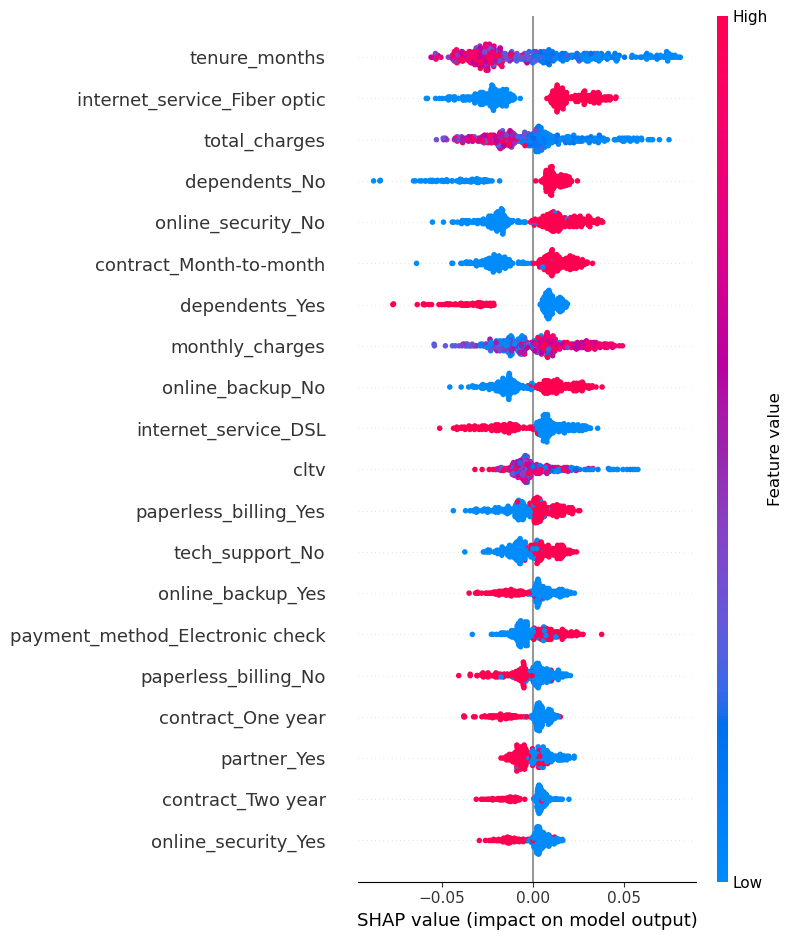

In [107]:
shap.summary_plot(shap_values[1], sub_x_train)

Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Service dissatisfaction                       89
Lack of self-service on Website               88
Extra data charges                            57
Moved                                         53
Limited range of services                     44
Long distance charges                         44
Lack of affordable download/upload speed      44
Poor expertise of phone support               20
Poor expertise of online support              19